# Classification by Consent Flag using Random Forest and XGBoost WITH Data Augumentation Techniques

## I. Introduction 

This repository contains the code and data for predicting customer behavior in an online store. The main goal of this project is to predict whether a given customer will make a purchase (1) or not (0) in the store. We explore two different classification models: Random Forest and XGBoost.



### Objectives

1. **Imported Necessary Libraries**: We've imported libraries like pandas, numpy, sklearn, imbalanced-learn (for data augmentation), RandomForestClassifier, xgboost, and others.

2. **Exploratory Data Analysis (EDA)**: We've loaded the dataset, displayed its head, described statistical information, and checked for missing values.

3. **Data Preparation**: We've separated input and target variables, performed one-hot encoding for categorical features, and label encoding for binary features.

4. **Balancing the Dataset**: We've applied different data augmentation techniques like Random Oversampling, Borderline SMOTE, ADASYN, and SMOTE to address class imbalance.

5. **Modeling**: We've trained Random Forest and XGBoost models using the augmented datasets and evaluated them using classification reports and confusion matrices.

6. **Cross-Validation**: We've also performed cross-validation for XGBoost using ADASYN, Borderline Smote, SMOTE, and Random Oversampling and evaluated the model's performance.



## II. Importing the nessesary libraries 

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, auc

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## III. Exploratory Data Analisys (EDA)

### Loading the data

In [2]:
data = pd.read_csv("C:/Users/aleksandar.dimitrov/Desktop/1.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Displaying statistical information about the dataset

In [3]:
data.describe(include = "all")


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


### Checking for missing values

In [4]:
missing_values = data.isnull().sum()
missing_values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## IV. Data Preparation

The data preparation process involves the following steps:

1. **Separating inputs and target** - this separate the variables into input and target variables
2. **One-hot encoding for categorical features "VisitorType" and "Month"** - this converts categorical data into numerical values, which is necessary for model training.
3. **Label encoding for the binary feature "Weekend"** - this converts binary data into numerical labels (0 and 1).
4. **Label encoding for the target variable "Revenue"** - this converts binary data into numerical labels (0 and 1).
5. **Splititng the data into training and testing sets** - this allow us to train the models on the training data and evaluate them on the testing data.

In [5]:
data_inputs = data.iloc[:,:-1]
data_target = data.iloc[:,-1]

In [6]:
data_inputs.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [7]:
data_target.head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

### Converting the categorical data into the appropriate data type - input variables

#### One_Hot Encoding for "VisitorType" column

In [8]:
one_hot_encoded_visitor = pd.get_dummies(data_inputs["VisitorType"], prefix="VisitorType")

#### One_Hot Encoding for "Month" column

In [9]:
# One-hot encoding
one_hot_encoded_month = pd.get_dummies(data_inputs["Month"], prefix="Month")

#### Label_Encoding for the binary feature "Weekend"

In [10]:
data_mod = data_inputs["Weekend"].replace({"False": 0, "True": 1}).astype(int)

#### Data Transformation and column removal

In [11]:
# Concatenate one-hot encoded columns and the original data
df_features = pd.concat([data_inputs, one_hot_encoded_visitor, one_hot_encoded_month], axis=1)

# Drop the original "VisitorType" and "Month" columns
df_features.drop(["VisitorType", "Month"], axis=1, inplace=True)
df_features.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [12]:
nan_check = data.isna().any()
nan_count = data.isna().sum()
nan_count


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Converting the categorical data into the appropriate data type - target variable
#### 0 - False (Not Making a Purchase)
#### 1 - True  (Making a purchase)

In [13]:
df_target = data_target.astype("category").cat.codes
df_target.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [14]:
counts = df_target.value_counts()
counts

0    10422
1     1908
dtype: int64

This imbalance poses a significant challenge when training models to predict purchases. Models may tend to predict most instances as Class 0 to achieve high accuracy. As a result, they may struggle with accurately predicting instances in Class 1, which is where the business may have a greater interest and revenue potential.

### Spitting the data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42, stratify = df_target)


### Balancing the dataset using Random Oversampling

<Axes: >

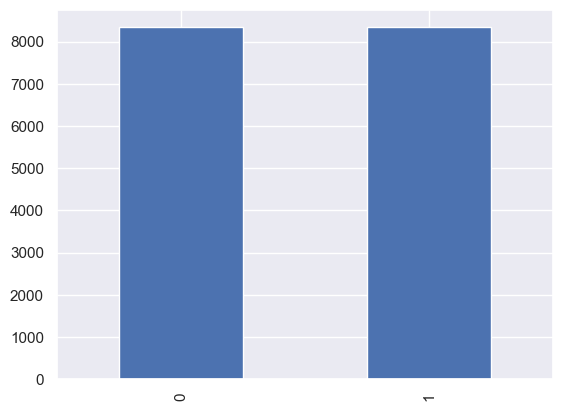

In [16]:
o_smpl = RandomOverSampler(random_state = 42) 
X_o_smpl, y_o_smpl = o_smpl.fit_resample(X_train,y_train)
y_o_smpl.value_counts().plot.bar()

### Balancing the dataset using Borderline Smote

<Axes: >

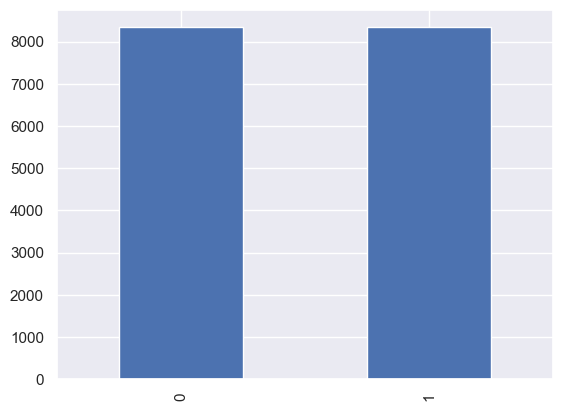

In [17]:
bsmote = BorderlineSMOTE(random_state = 42) 
X_bsmote, y_bsmote = bsmote.fit_resample(X_train,y_train)
y_bsmote.value_counts().plot.bar()

### Balancing the dataset using Adaptive Synthetic Oversampling (ADASYN)

<Axes: >

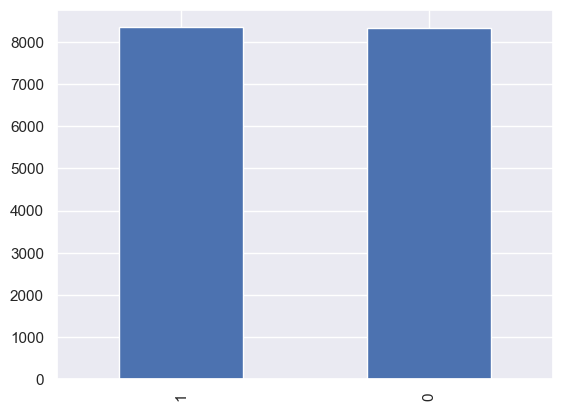

In [18]:
adasyn = ADASYN(random_state = 42) 
X_ada, y_ada = adasyn.fit_resample(X_train,y_train)
y_ada.value_counts().plot.bar()

### Balancing the dataset using Synthetic Minority Oversampling (SMOTE)

<Axes: >

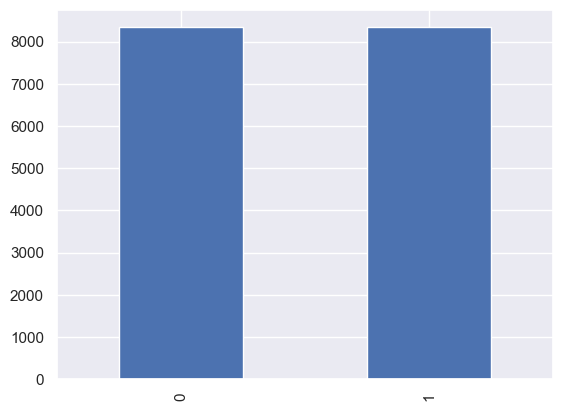

In [19]:
smote = SMOTE(random_state = 42) 
X_smote, y_smote = smote.fit_resample(X_train,y_train)
y_smote.value_counts().plot.bar()

## V. Modelling

1. Model I - Random Forest using data augumentation techniques
2. Model II - XGBoost using data augumentation techniques


### Initializing and training the Random Forest model using SMOTE

In [20]:
rf_model = RandomForestClassifier(random_state=42)

In [21]:
rf_model.fit(X_smote, y_smote)

RandomForestClassifier(random_state=42)

In [22]:
predictions = rf_model.predict(X_test) 

In [23]:
class_report = classification_report(y_test, predictions)

In [24]:
conf_matrix = confusion_matrix(y_test, predictions)

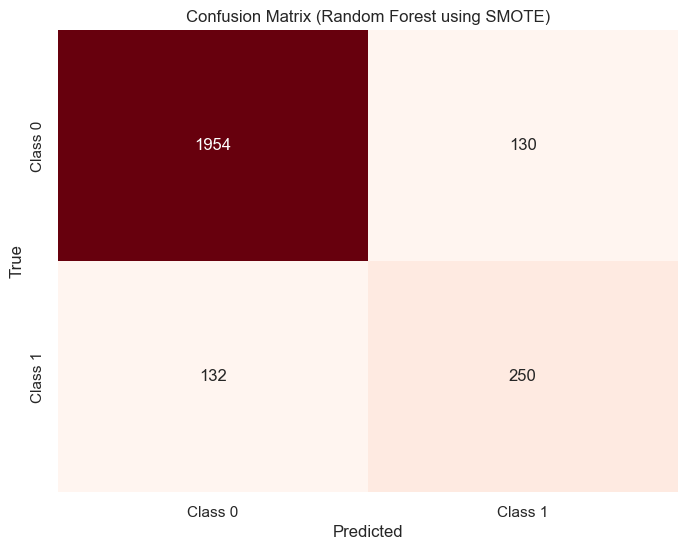

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Reds", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Random Forest using SMOTE)")
plt.show()

In [26]:
print("Classification Report (Random Forest using SMOTE):")
print(class_report)

Classification Report (Random Forest using SMOTE):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2084
           1       0.66      0.65      0.66       382

    accuracy                           0.89      2466
   macro avg       0.80      0.80      0.80      2466
weighted avg       0.89      0.89      0.89      2466



### Initializing and training the Random Forest model using Random Oversampling

In [27]:
rf_model = RandomForestClassifier(random_state=42)

In [28]:
rf_model.fit(X_o_smpl, y_o_smpl)

RandomForestClassifier(random_state=42)

In [29]:
predictions = rf_model.predict(X_test) 

In [30]:
class_report = classification_report(y_test, predictions)

In [31]:
conf_matrix = confusion_matrix(y_test, predictions)

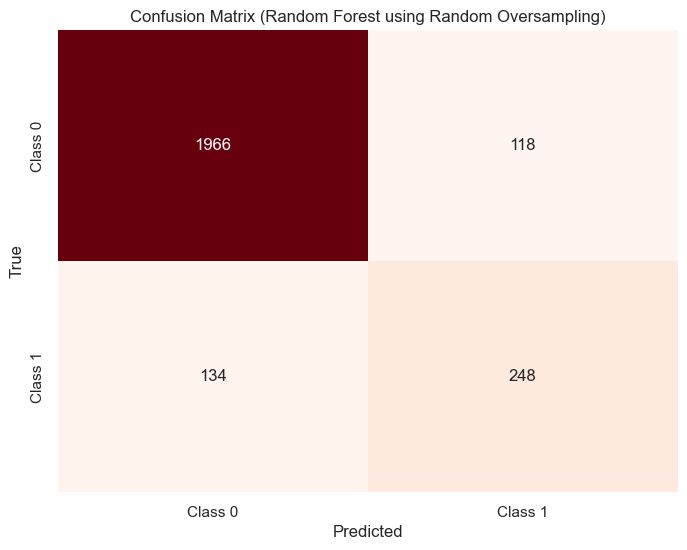

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Reds", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Random Forest using Random Oversampling)")
plt.show()

In [33]:
print("Classification Report (Random Forest using Random Oversampling):")
print(class_report)

Classification Report (Random Forest using Random Oversampling):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2084
           1       0.68      0.65      0.66       382

    accuracy                           0.90      2466
   macro avg       0.81      0.80      0.80      2466
weighted avg       0.90      0.90      0.90      2466



### Initializing and training the Random Forest model using Borderline Smote

In [34]:
rf_model = RandomForestClassifier(random_state=42)

In [35]:
rf_model.fit(X_bsmote, y_bsmote)

RandomForestClassifier(random_state=42)

In [36]:
predictions = rf_model.predict(X_test) 

In [37]:
class_report = classification_report(y_test, predictions)

In [38]:
conf_matrix = confusion_matrix(y_test, predictions)

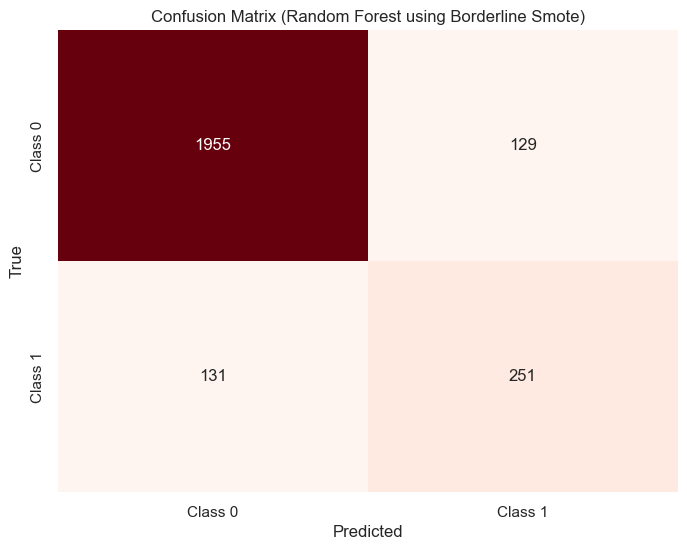

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Reds", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Random Forest using Borderline Smote)")
plt.show()

In [40]:
print("Classification Report (Random Forest using Borderline Smoteg):")
print(class_report)

Classification Report (Random Forest using Borderline Smoteg):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2084
           1       0.66      0.66      0.66       382

    accuracy                           0.89      2466
   macro avg       0.80      0.80      0.80      2466
weighted avg       0.89      0.89      0.89      2466



### Initializing and training the XGboost model using Random Oversampling

In [41]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [42]:
xgb_model.fit(X_o_smpl, y_o_smpl)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [43]:
xgb_predictions = xgb_model.predict(X_test)

In [44]:
xgb_class_report = classification_report(y_test, xgb_predictions)

In [45]:
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

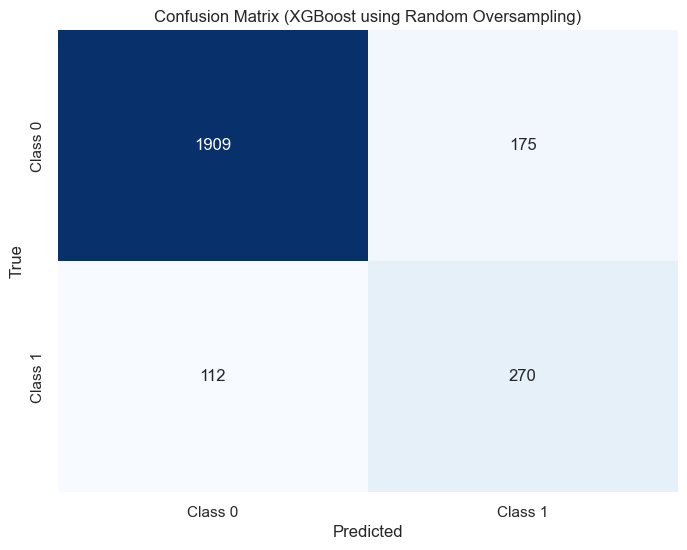

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (XGBoost using Random Oversampling)")
plt.show()

In [47]:
print("Classification Report (XGBoost using Random Oversampling):")
print(class_report)

Classification Report (XGBoost using Random Oversampling):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2084
           1       0.66      0.66      0.66       382

    accuracy                           0.89      2466
   macro avg       0.80      0.80      0.80      2466
weighted avg       0.89      0.89      0.89      2466



### Initializing and training the XGboost model using Borderline Smote


In [48]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [49]:
xgb_model.fit(X_bsmote, y_bsmote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [50]:
xgb_predictions = xgb_model.predict(X_test)

In [51]:
xgb_class_report = classification_report(y_test, xgb_predictions)

In [52]:
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

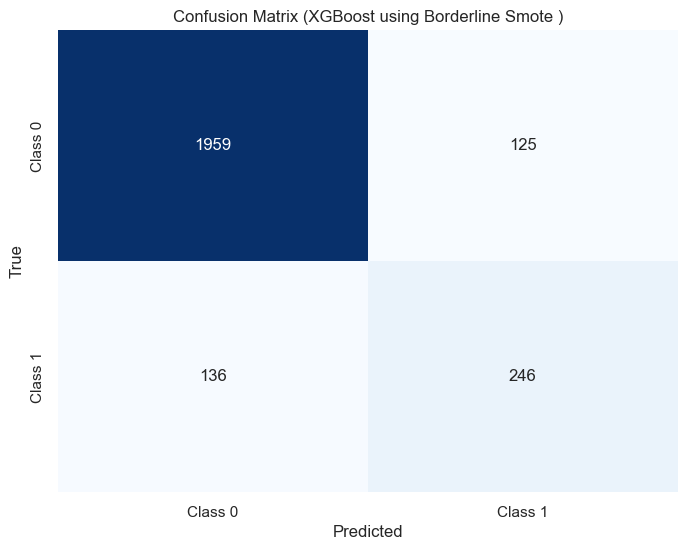

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (XGBoost using Borderline Smote )")
plt.show()

In [54]:
print("Classification Report (XGBoost using Borderline Smote):")
print(class_report)

Classification Report (XGBoost using Borderline Smote):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2084
           1       0.66      0.66      0.66       382

    accuracy                           0.89      2466
   macro avg       0.80      0.80      0.80      2466
weighted avg       0.89      0.89      0.89      2466



### Initializing and training the XGboost model using ADASYN

In [55]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [56]:
xgb_model.fit(X_ada, y_ada)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [57]:
xgb_predictions = xgb_model.predict(X_test)

In [58]:
xgb_class_report = classification_report(y_test, xgb_predictions)

In [59]:
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

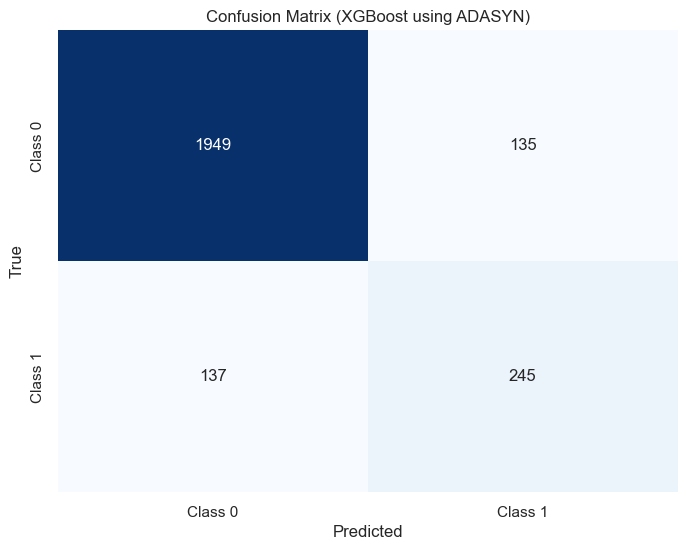

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (XGBoost using ADASYN)")
plt.show()

In [61]:
print("Classification Report (XGBoost using ADASYN):")
print(class_report)

Classification Report (XGBoost using ADASYN):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2084
           1       0.66      0.66      0.66       382

    accuracy                           0.89      2466
   macro avg       0.80      0.80      0.80      2466
weighted avg       0.89      0.89      0.89      2466



### Initializing and training the XGboost model using SMOTE

In [62]:
xgb_model = xgb.XGBClassifier(random_state=42)


In [63]:
xgb_model.fit(X_smote, y_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [64]:
xgb_predictions = xgb_model.predict(X_test)


In [65]:
xgb_class_report = classification_report(y_test, xgb_predictions)


In [66]:
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)


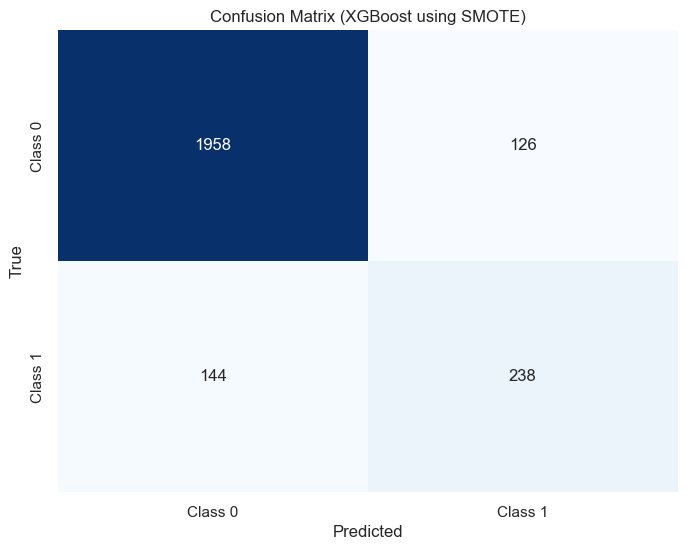

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (XGBoost using SMOTE)")
plt.show()

In [68]:
print("Classification Report (XGBoost using SMOTE):")
print(class_report)

Classification Report (XGBoost using SMOTE):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2084
           1       0.66      0.66      0.66       382

    accuracy                           0.89      2466
   macro avg       0.80      0.80      0.80      2466
weighted avg       0.89      0.89      0.89      2466



### Initializing and training the XGboost model using cross-validation using ADASYN 

In [69]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [70]:
xgb_predictions = cross_val_predict(xgb_model, X_ada, y_ada, cv=5)

In [71]:
xgb_class_report = classification_report(y_ada, xgb_predictions)

In [72]:
xgb_conf_matrix = confusion_matrix(y_ada, xgb_predictions)

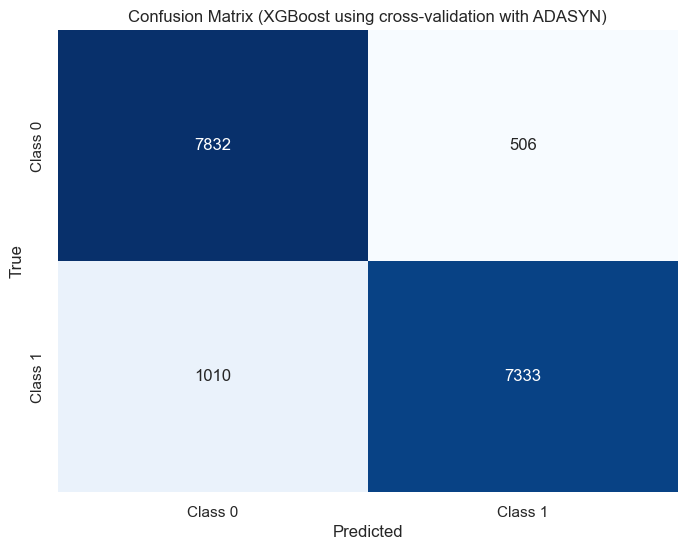

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (XGBoost using cross-validation with ADASYN)")
plt.show()

In [74]:
print("Classification Report (XGBoost using cross-validation with ADASYN):")
print(xgb_class_report)

Classification Report (XGBoost using cross-validation with ADASYN):
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      8338
           1       0.94      0.88      0.91      8343

    accuracy                           0.91     16681
   macro avg       0.91      0.91      0.91     16681
weighted avg       0.91      0.91      0.91     16681



### Initializing and training the XGboost model using cross-validation with Borderline Smote

In [75]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [76]:
xgb_predictions = cross_val_predict(xgb_model, X_bsmote, y_bsmote, cv=5)

In [77]:
xgb_class_report = classification_report(y_bsmote, xgb_predictions)

In [78]:
xgb_conf_matrix = confusion_matrix(y_bsmote, xgb_predictions)

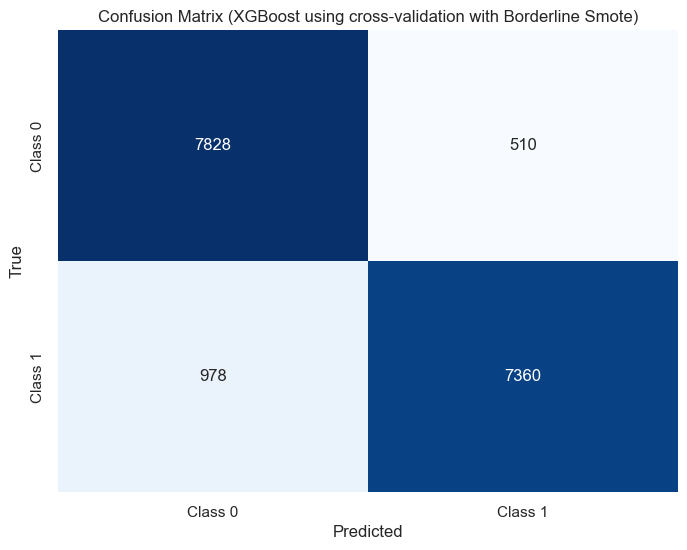

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (XGBoost using cross-validation with Borderline Smote)")
plt.show()

In [80]:
print("Classification Report (XGBoost using cross-validation with Borderline Smote):")
print(xgb_class_report)

Classification Report (XGBoost using cross-validation with Borderline Smote):
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      8338
           1       0.94      0.88      0.91      8338

    accuracy                           0.91     16676
   macro avg       0.91      0.91      0.91     16676
weighted avg       0.91      0.91      0.91     16676



### Initializing and training the XGboost model using cross-validation with SMOTE

In [81]:
xgb_model = xgb.XGBClassifier(random_state=42)


In [82]:
xgb_predictions = cross_val_predict(xgb_model, X_smote, y_smote, cv=5)


In [83]:
xgb_class_report = classification_report(y_smote, xgb_predictions)


In [84]:
xgb_conf_matrix = confusion_matrix(y_smote, xgb_predictions)


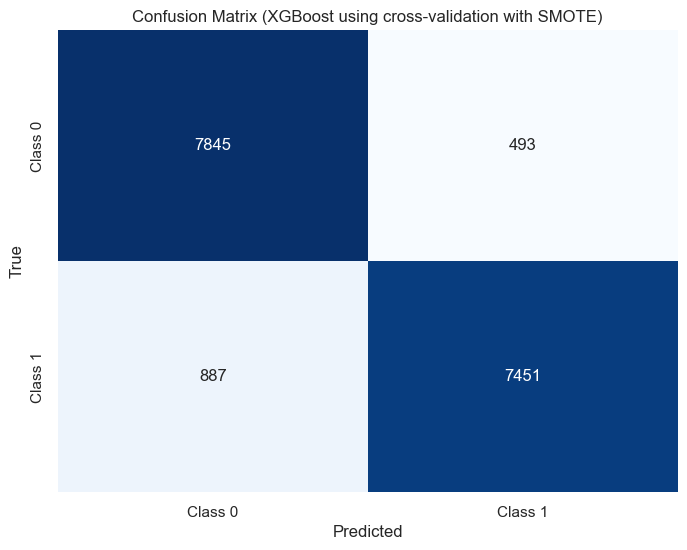

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (XGBoost using cross-validation with SMOTE)")
plt.show()

In [86]:
print("Classification Report (XGBoost using cross-validation with SMOTE):")
print(xgb_class_report)

Classification Report (XGBoost using cross-validation with SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      8338
           1       0.94      0.89      0.92      8338

    accuracy                           0.92     16676
   macro avg       0.92      0.92      0.92     16676
weighted avg       0.92      0.92      0.92     16676



### Initializing and training the XGboost model using cross-validation with Random Oversampling

In [87]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [88]:
xgb_predictions = cross_val_predict(xgb_model, X_o_smpl, y_o_smpl, cv=5)

In [89]:
xgb_class_report = classification_report(y_o_smpl, xgb_predictions)

In [90]:
xgb_conf_matrix = confusion_matrix(y_o_smpl, xgb_predictions)

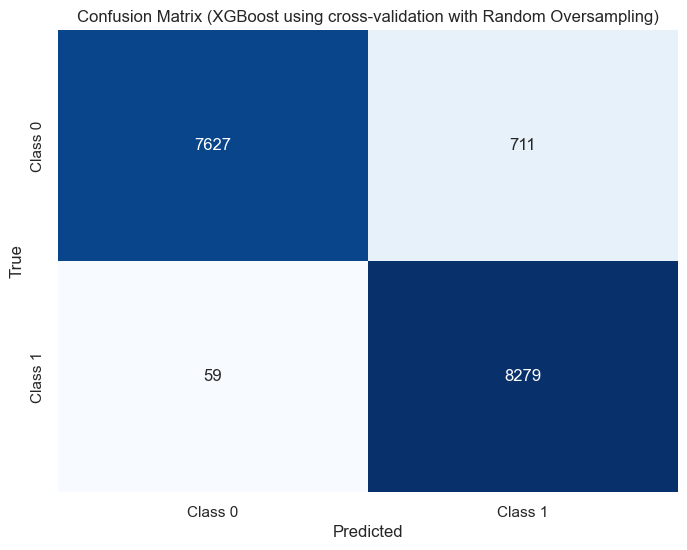

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (XGBoost using cross-validation with Random Oversampling)")
plt.show()

In [92]:
print("Classification Report (XGBoost using cross-validation with Random Oversampling):")
print(xgb_class_report)

Classification Report (XGBoost using cross-validation with Random Oversampling):
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      8338
           1       0.92      0.99      0.96      8338

    accuracy                           0.95     16676
   macro avg       0.96      0.95      0.95     16676
weighted avg       0.96      0.95      0.95     16676

